In [26]:
!pip install scikit-learn dotenv

Defaulting to user installation because normal site-packages is not writeable


In [27]:
import os 
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import os
from skyfield.api import Topos

from skyfield.api import load, wgs84, EarthSatellite, Topos
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

In [28]:
load_dotenv()

# Parse user location from .env
latitude = float(os.getenv('LATITUDE'))
longitude = float(os.getenv('LONGITUDE'))
elevation = float(os.getenv('ELEVATION'))

In [29]:
base_path = "output"
if not os.path.exists(f"{base_path}/connection_periods.csv"):
    print("Could not find connection_periods.csv")
else: 
    df_conn_periods = pd.read_csv(f"{base_path}/connection_periods.csv")


if not os.path.exists(f"{base_path}/combined_serving_satellite.csv"):
    print("Could not find combined_serving_satellite.csv")
else: 
    df_serving_satellite = pd.read_csv(f"{base_path}/combined_serving_satellite.csv")

# subtract one second in time from the end time for the connection peroids
df_conn_periods['End_Time'] = pd.to_datetime(df_conn_periods['End_Time']) - pd.Timedelta(seconds=1)

In [30]:
print(f"df_conn_periods.columns: {df_conn_periods.columns}")
print(f"df_serving_satellite.columns: {df_serving_satellite.columns}")

# first and last row
print(df_conn_periods.iloc[0])
print(df_conn_periods.iloc[-1])
print(df_serving_satellite.iloc[0])
print(df_serving_satellite.iloc[-1])


df_conn_periods.columns: Index(['Satellite', 'Start_Time', 'End_Time', 'Duration_Seconds',
       'Mean_Altitude_km', 'TLE_Line1', 'TLE_Line2', 'TLE_Timestamp'],
      dtype='object')
df_serving_satellite.columns: Index(['Timestamp', 'Connected_Satellite', 'Distance', 'TLE_Line1',
       'TLE_Line2', 'TLE_Timestamp', 'Altitude_km'],
      dtype='object')
Satellite                                                                   STARLINK-2460
Start_Time                                                      2025-05-31 17:00:12+00:00
End_Time                                                        2025-05-31 17:01:25+00:00
Duration_Seconds                                                                     74.0
Mean_Altitude_km                                                               551.374242
TLE_Line1           1 48120U 21027AE  25151.29888419 -.00000625  00000+0 -23076-4 0  9996
TLE_Line2           2 48120  53.0559 359.3218 0001354  89.3165 270.7979 15.06403207229451
TLE_Timestamp

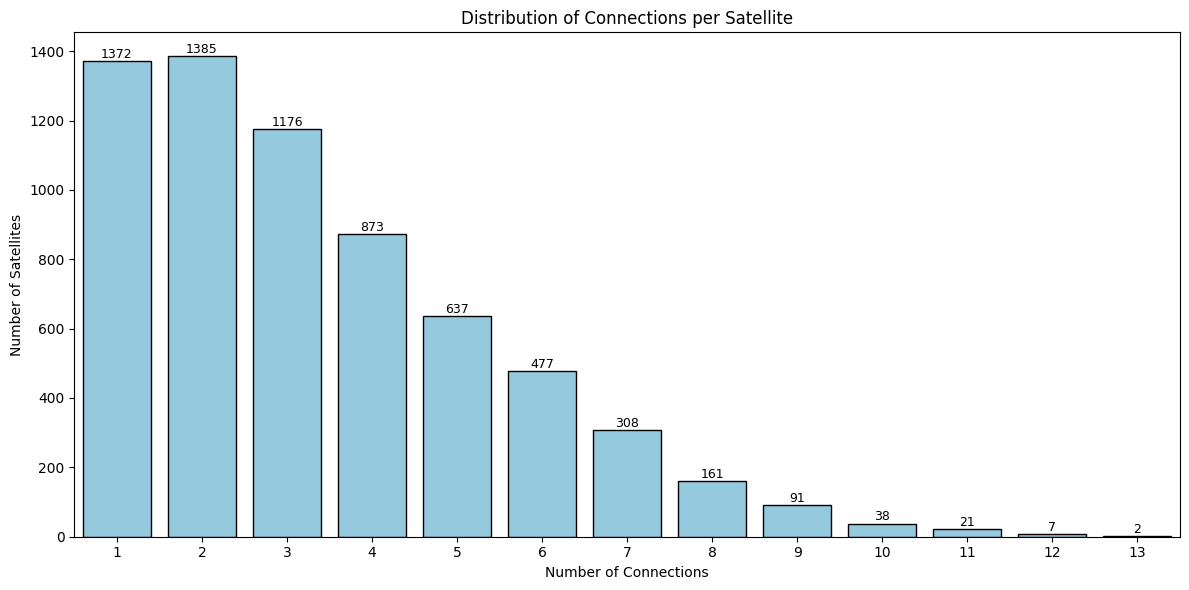

In [47]:
# Get count of satellites by number of connections
connection_distribution = df_conn_periods['Satellite'].value_counts().value_counts().sort_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=connection_distribution.index, y=connection_distribution.values, color='skyblue', edgecolor='black')

# Label each bar
for i, v in enumerate(connection_distribution.values):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=9)

plt.xlabel('Number of Connections')
plt.ylabel('Number of Satellites')
plt.title('Distribution of Connections per Satellite')
plt.tight_layout()
plt.show()

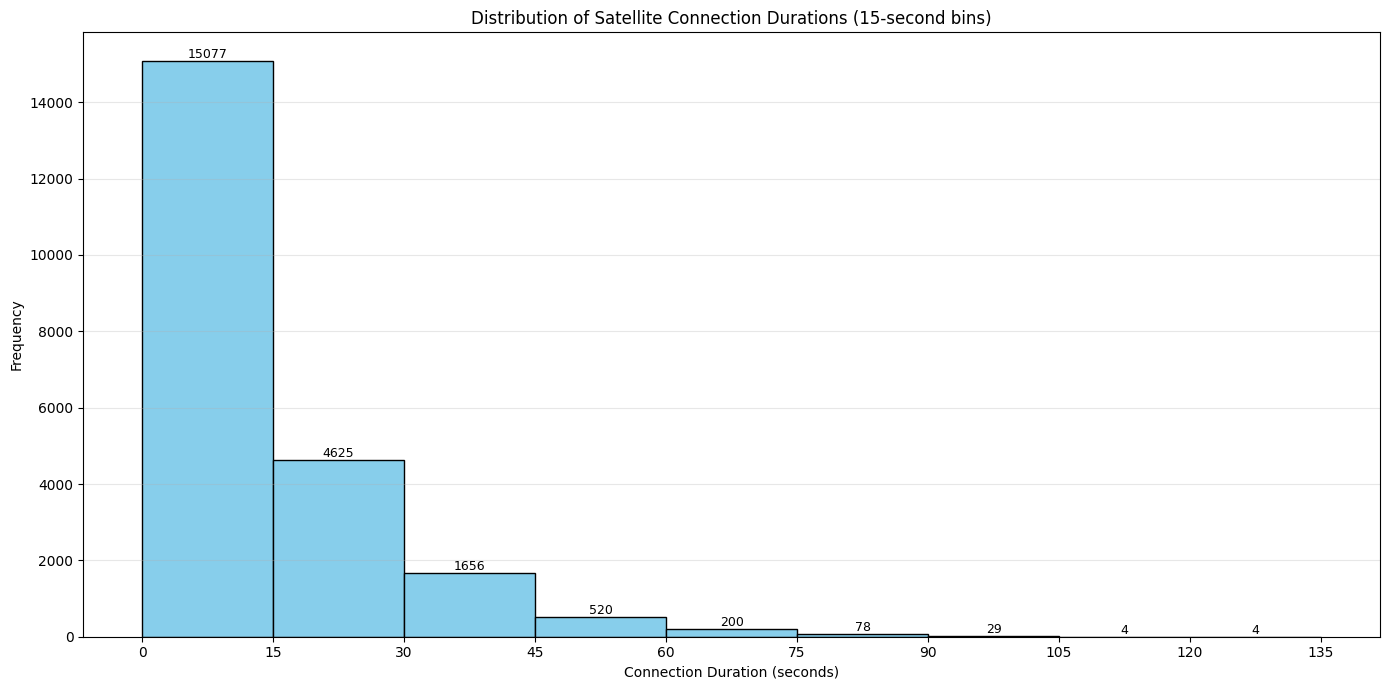

In [46]:
import matplotlib.pyplot as plt
import numpy as np

durations_filtered = df_conn_periods['Duration_Seconds']

# Define bins divisible by 15 seconds from min to max duration
min_dur = 0
max_dur = np.ceil(durations_filtered.max() / 15) * 15
bins = np.arange(min_dur, max_dur + 15, 15)  # bins edges: 0,15,30,...

# Histogram counts and bin edges
counts, bin_edges = np.histogram(durations_filtered, bins=bins)

plt.figure(figsize=(14, 7))
bars = plt.bar(bin_edges[:-1], counts, width=15, color='skyblue', edgecolor='black', align='edge')

plt.xlabel('Connection Duration (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Satellite Connection Durations (15-second bins)')
plt.xticks(bin_edges)  # show all bin edges as x ticks
plt.grid(True, alpha=0.3, axis='y')

# Label bars on top
for bar in bars:
    height = bar.get_height()
    if height > 0:
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, str(int(height)), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()



In [34]:

# Get unique satellite names and their connection counts
satellite_names = df_conn_periods['Satellite'].unique()
satellite_names = [name for name in satellite_names if name != '']
print(f"Number of unique satellite names: {len(satellite_names)}")


# Get top 10 most frequently seen satellites
satellite_counts = df_conn_periods['Satellite'].value_counts()
satellite_counts = satellite_counts[satellite_counts.index != '']
top_10_satellites = satellite_counts.head(10)

# For each top satellite, show connection durations
print("\nTop 10 satellites and their connection durations:")
for satellite in top_10_satellites.index:
    satellite_data = df_conn_periods[df_conn_periods['Satellite'] == satellite]
    print(f"\n{satellite} (seen {top_10_satellites[satellite]} times):")
    print(satellite_data[['Start_Time', 'End_Time', 'Duration_Seconds']].to_string(index=False))

Number of unique satellite names: 6548

Top 10 satellites and their connection durations:

STARLINK-30611 (seen 13 times):
               Start_Time                  End_Time  Duration_Seconds
2025-06-01 18:56:12+00:00 2025-06-01 18:56:40+00:00              29.0
2025-06-01 18:57:27+00:00 2025-06-01 18:57:40+00:00              14.0
2025-06-01 22:12:42+00:00 2025-06-01 22:12:55+00:00              14.0
2025-06-01 22:13:42+00:00 2025-06-01 22:13:55+00:00              14.0
2025-06-01 23:49:57+00:00 2025-06-01 23:50:10+00:00              14.0
2025-06-02 18:17:57+00:00 2025-06-02 18:18:10+00:00              14.0
2025-06-02 23:11:27+00:00 2025-06-02 23:12:25+00:00              59.0
2025-06-03 17:39:27+00:00 2025-06-03 17:40:40+00:00              74.0
2025-06-04 17:01:57+00:00 2025-06-04 17:02:55+00:00              59.0
2025-06-04 21:55:12+00:00 2025-06-04 21:55:25+00:00              14.0
2025-06-05 16:23:12+00:00 2025-06-05 16:23:25+00:00              14.0
2025-06-05 16:23:42+00:00 2025-06-05 

In [35]:

# Get unique satellite names and their connection counts
satellite_names = df_conn_periods['Satellite'].unique()
satellite_names = [name for name in satellite_names if name != '']
print(f"Number of unique satellite names: {len(satellite_names)}")


# Get top 10 most frequently seen satellites
satellite_counts = df_conn_periods['Satellite'].value_counts()
satellite_counts = satellite_counts[satellite_counts.index != '']
top_10_satellites = satellite_counts.tail(10)

# For each top satellite, show connection durations
print("\nTop 10 satellites and their connection durations:")
for satellite in top_10_satellites.index:
    satellite_data = df_conn_periods[df_conn_periods['Satellite'] == satellite]
    print(f"\n{satellite} (seen {top_10_satellites[satellite]} times):")
    print(satellite_data[['Start_Time', 'End_Time', 'Duration_Seconds']].to_string(index=False))

Number of unique satellite names: 6548

Top 10 satellites and their connection durations:

STARLINK-3225 (seen 1 times):
               Start_Time                  End_Time  Duration_Seconds
2025-06-06 12:38:57+00:00 2025-06-06 12:39:25+00:00              29.0

STARLINK-32802 (seen 1 times):
               Start_Time                  End_Time  Duration_Seconds
2025-06-06 12:38:12+00:00 2025-06-06 12:38:25+00:00              14.0

STARLINK-32898 (seen 1 times):
               Start_Time                  End_Time  Duration_Seconds
2025-06-06 12:29:42+00:00 2025-06-06 12:29:55+00:00              14.0

STARLINK-33622 (seen 1 times):
               Start_Time                  End_Time  Duration_Seconds
2025-06-06 12:25:27+00:00 2025-06-06 12:25:40+00:00              14.0

STARLINK-11337 [DTC] (seen 1 times):
               Start_Time                  End_Time  Duration_Seconds
2025-06-06 12:22:12+00:00 2025-06-06 12:22:25+00:00              14.0

STARLINK-6161 (seen 1 times):
              


--- TLE Info ---
TLE Timestamp: 2025-05-31 19:00:00+00:00
TLE Line 1: 1 47750U 21017AE  25151.34773339 -.00000752  00000+0 -31564-4 0  9995
TLE Line 2: 2 47750  53.0565  29.1011 0001418  98.6740 261.4409 15.06398471235315
Start time: 2025-05-31 19:48:42+00:00, Elevation: 37.32344544858004, Azimuth: 329.65569899119765
End time: 2025-05-31 19:48:55+00:00, Elevation: 37.841256197193694, Azimuth: 337.65764243037665

--- TLE Info ---
TLE Timestamp: 2025-06-01 18:00:00+00:00
TLE Line 1: 1 47750U 21017AE  25151.94485576  .00000933  00000+0  81509-4 0  9997
TLE Line 2: 2 47750  53.0560  26.4207 0001305  96.7003 263.4135 15.06394344235406
Start time: 2025-06-01 18:03:42+00:00, Elevation: 57.36700741539448, Azimuth: 79.70728917934274
End time: 2025-06-01 18:03:55+00:00, Elevation: 51.0345211609016, Azimuth: 74.35678776177294

--- TLE Info ---
TLE Timestamp: 2025-06-01 19:00:00+00:00
TLE Line 1: 1 47750U 21017AE  25152.60833966  .00017970  00000+0  12242-2 0  9996
TLE Line 2: 2 47750  53.0564  2

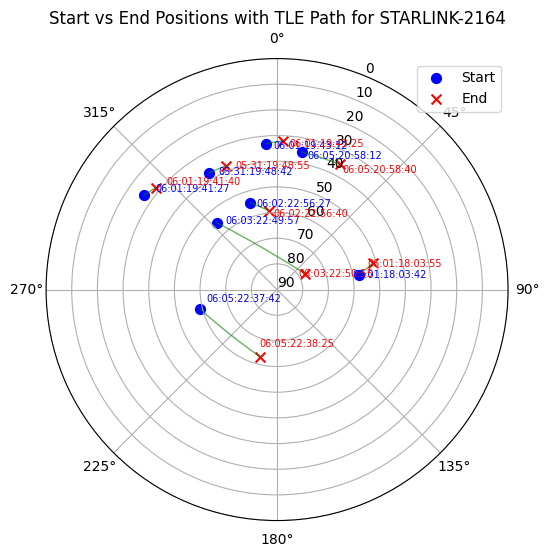

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from skyfield.api import load, EarthSatellite, wgs84
import pandas as pd

ts = load.timescale()
user_location = wgs84.latlon(latitude, longitude, elevation_m=elevation)

# Filter just one satellite RANDOM
random_sat = df_conn_periods['Satellite'].unique()[np.random.randint(0, len(df_conn_periods['Satellite'].unique()))]
single_sat = df_conn_periods[df_conn_periods['Satellite'] == random_sat]

azimuths_start = []
elevations_start = []
azimuths_end = []
elevations_end = []
start_times = []
end_times = []

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, polar=True)

for _, row in single_sat.iterrows():
    tle_timestamp = row['TLE_Timestamp']
    tle_line1 = row['TLE_Line1']
    tle_line2 = row['TLE_Line2']
    start_time_dt = pd.to_datetime(row['Start_Time'])
    end_time_dt = pd.to_datetime(row['End_Time'])


    print("\n--- TLE Info ---")
    print(f"TLE Timestamp: {tle_timestamp}")
    print(f"TLE Line 1: {tle_line1}")
    print(f"TLE Line 2: {tle_line2}")

    satellite = EarthSatellite(tle_line1, tle_line2, random_sat, ts)

    # Start time
    t_start = ts.from_datetime(start_time_dt)
    topocentric_start = (satellite - user_location).at(t_start)
    alt_start, az_start, _ = topocentric_start.altaz()
    az_start_rad = np.radians(az_start.degrees)
    azimuths_start.append(az_start_rad)
    elevations_start.append(alt_start.degrees)
    start_times.append(start_time_dt.strftime("%H:%M"))

    print(f"Start time: {start_time_dt}, Elevation: {alt_start.degrees}, Azimuth: {az_start.degrees}")

    # End time
    t_end = ts.from_datetime(end_time_dt)
    topocentric_end = (satellite - user_location).at(t_end)
    alt_end, az_end, _ = topocentric_end.altaz()
    az_end_rad = np.radians(az_end.degrees)
    azimuths_end.append(az_end_rad)
    elevations_end.append(alt_end.degrees)
    end_times.append(end_time_dt.strftime("%H:%M"))

    print(f"End time: {end_time_dt}, Elevation: {alt_end.degrees}, Azimuth: {az_end.degrees}")

    # --- Draw TLE curve between start and end ---
    time_array = ts.linspace(t_start, t_end, 50)

    # Get azimuths and elevations for all points
    az_list_deg = []
    el_list = []
    
    for t in time_array:
        topo = (satellite - user_location).at(t)
        alt, az, _ = topo.altaz()
        az_list_deg.append(az.degrees)
        el_list.append(alt.degrees)
    
    # Convert to radians and unwrap
    az_list_rad = np.unwrap(np.radians(az_list_deg))

    ax.plot(az_list_rad, el_list, color='green', alpha=0.6, linewidth=1)

# Plot start points
ax.scatter(azimuths_start, elevations_start, c='blue', s=50, label='Start')

# Plot end points
ax.scatter(azimuths_end, elevations_end, c='red', s=50, marker='x', label='End')

# Add labels for start times (small text, slightly offset)
# Format times with full date and time
start_times = [pd.to_datetime(t).strftime("%m:%d:%H:%M:%S") for t in single_sat['Start_Time']]
end_times = [pd.to_datetime(t).strftime("%m:%d:%H:%M:%S") for t in single_sat['End_Time']]


# Add labels for start times (offset to top-right)
for az, el, t_str in zip(azimuths_start, elevations_start, start_times):
    # Offset: +3 degrees elevation, +0.05 radians azimuth to right
    ax.text(az + 0.05, el + 3, t_str, fontsize=7, color='blue', ha='left', va='bottom')

# Add labels for end times (offset to top-right)
for az, el, t_str in zip(azimuths_end, elevations_end, end_times):
    # Offset: +3 degrees elevation, +0.05 radians azimuth to right
    ax.text(az + 0.05, el + 3, t_str, fontsize=7, color='red', ha='left', va='bottom')


ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.set_rlim(90, 0)  # 90° center, 0° edge

plt.title(f'Start vs End Positions with TLE Path for {random_sat}')
plt.legend()
plt.show()




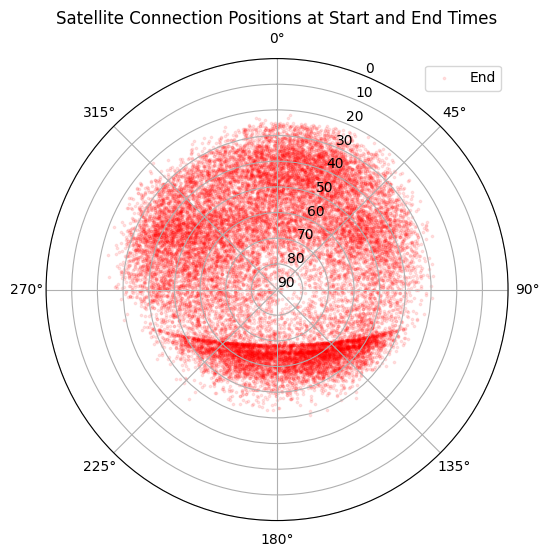

In [37]:
# Ensure timescale and user location are initialized
ts = load.timescale()
user_location = wgs84.latlon(latitude, longitude, elevation_m=elevation)

# Initialize lists for azimuths and elevations at connection start and end
azimuths_start = []
elevations_start = []
azimuths_end = []
elevations_end = []

# Iterate through all rows in the DataFrame
for _, row in df_conn_periods.iterrows():
    tle_line1 = row['TLE_Line1']
    tle_line2 = row['TLE_Line2']
    sat_name = row['Satellite']
    start_time_dt = pd.to_datetime(row['Start_Time'])
    end_time_dt = pd.to_datetime(row['End_Time'])

    # Create satellite object
    satellite = EarthSatellite(tle_line1, tle_line2, sat_name, ts)

    # Compute satellite's position at start time relative to observer
    t_start = ts.from_datetime(start_time_dt)
    topocentric_start = (satellite - user_location).at(t_start)
    alt_start, az_start, _ = topocentric_start.altaz()

    if alt_start.degrees > 0:
        azimuths_start.append(np.radians(az_start.degrees))
        elevations_start.append(alt_start.degrees)

    # Compute satellite's position at end time relative to observer
    t_end = ts.from_datetime(end_time_dt)
    topocentric_end = (satellite - user_location).at(t_end)
    alt_end, az_end, _ = topocentric_end.altaz()

    if alt_end.degrees > 0:
        azimuths_end.append(np.radians(az_end.degrees))
        elevations_end.append(alt_end.degrees)

# Plot as polar
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, polar=True)

# Start times in blue
ax.scatter(azimuths_start, elevations_start, c='blue', s=3, alpha=0.2, label='Start')

# End times in red
ax.scatter(azimuths_end, elevations_end, c='red', s=3, alpha=0.1, label='End')

ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.set_rlim(90, 0)  # Center is zenith, edge is horizon

plt.title('Satellite Connection Positions at Start and End Times')
plt.legend()
plt.show()


In [38]:
# graph the median latency
sat = 'STARLINK-30611'
new_df = df_conn_periods[df_conn_periods['Satellite'] == sat]
print(f"Number of rows for STARLINK-5185: {len(new_df)}")
print(new_df['Mean_Altitude_km'])

print(new_df['Start_Time'].nunique())
print(new_df[['Start_Time', 'End_Time']])

plt.figure(figsize=(12, 6))
plt.plot(new_df['Start_Time'], new_df['Mean_popPingLatencyMs'], marker='o', linestyle='-', markersize=5)
plt.xlabel('Start Time')
plt.xticks(rotation=45)
plt.ylabel('Ping Latency (ms)')
plt.title('Ping Latency Over Time for {}'.format(sat))
plt.grid(True)
plt.tight_layout()
plt.show()


Number of rows for STARLINK-5185: 13
4030     451.902085
4034     452.311056
4578     452.708056
4582     452.429318
4723     451.380660
7615     451.771802
8401     451.333728
11277    451.722039
14926    452.107249
15684    452.271255
18579    451.109802
18581    451.335754
19368    451.960682
Name: Mean_Altitude_km, dtype: float64
13
                      Start_Time                  End_Time
4030   2025-06-01 18:56:12+00:00 2025-06-01 18:56:40+00:00
4034   2025-06-01 18:57:27+00:00 2025-06-01 18:57:40+00:00
4578   2025-06-01 22:12:42+00:00 2025-06-01 22:12:55+00:00
4582   2025-06-01 22:13:42+00:00 2025-06-01 22:13:55+00:00
4723   2025-06-01 23:49:57+00:00 2025-06-01 23:50:10+00:00
7615   2025-06-02 18:17:57+00:00 2025-06-02 18:18:10+00:00
8401   2025-06-02 23:11:27+00:00 2025-06-02 23:12:25+00:00
11277  2025-06-03 17:39:27+00:00 2025-06-03 17:40:40+00:00
14926  2025-06-04 17:01:57+00:00 2025-06-04 17:02:55+00:00
15684  2025-06-04 21:55:12+00:00 2025-06-04 21:55:25+00:00
18579  2025-

KeyError: 'Mean_popPingLatencyMs'

<Figure size 1200x600 with 0 Axes>

In [16]:
def extract_mean_motion(tle_line2):
    try:
        # Extract characters at positions 53-63 (0-indexed: 52–63, exclusive)
        mean_motion_str = tle_line2[52:63].strip()
        return float(mean_motion_str)
    except Exception:
        return None

# Compute mean motion and orbital periods
df_conn_periods['Mean_Motion'] = df_conn_periods['TLE_Line2'].apply(extract_mean_motion)
df_conn_periods['Orbital_Period_Minutes'] = df_conn_periods['Mean_Motion'].apply(
    lambda n: 1440 / n if pd.notnull(n) and n != 0 else None
)
df_conn_periods['Orbital_Period_Days'] = df_conn_periods['Mean_Motion'].apply(
    lambda n: 1 / n if pd.notnull(n) and n != 0 else None
)

sat = 'STARLINK-32827'
# Preview
# print(df_conn_periods[['Satellite', 'Mean_Motion', 'Orbital_Period_Minutes', 'Mean_Altitude_km']]['Satellite'] == 'STARLINK-4732')
print(df_conn_periods[df_conn_periods['Satellite'] == sat][['Satellite', 'Mean_Motion', 'Orbital_Period_Minutes']])
df = (df_conn_periods[df_conn_periods['Satellite'] == sat]).copy()

# print(df_conn_periods[['Satellite', 'Mean_Motion', 'Orbital_Period_Minutes', 'Mean_Altitude_km']].head())


            Satellite  Mean_Motion  Orbital_Period_Minutes
5015   STARLINK-32827    15.302104               94.104705
8985   STARLINK-32827    15.301799               94.106582
9517   STARLINK-32827    15.301799               94.106582
12670  STARLINK-32827    15.301963               94.105572
13201  STARLINK-32827    15.301963               94.105572
20033  STARLINK-32827    15.302064               94.104953


In [17]:
from datetime import datetime

# Ensure time columns are datetime
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])

# Sort chronologically by Start_Time
df = df.sort_values('Start_Time').reset_index(drop=True)

# Calculate time since previous connection (in minutes)
df['Minutes_Since_Last_Contact'] = df['Start_Time'].diff().dt.total_seconds() / 60

# Calculate number of orbits completed between connections
df['Orbits_Since_Last_Contact'] = df['Minutes_Since_Last_Contact'] / df['Orbital_Period_Minutes']

# Optional: round orbits to nearest integer
df['Orbits_Since_Last_Contact'] = df['Orbits_Since_Last_Contact'].round(2)

print(df[['Minutes_Since_Last_Contact', 'Orbits_Since_Last_Contact']])


   Minutes_Since_Last_Contact  Orbits_Since_Last_Contact
0                         NaN                        NaN
1                     1507.00                      16.01
2                      197.00                       2.09
3                     1213.75                      12.90
4                      196.75                       2.09
5                     2625.25                      27.90


In [18]:
import datetime
from skyfield.api import load
def get_visible_satellites(timestamp_str, all_satellites, centralLat, centralLon, offsetLat, offsetLon):
    timestamp_dt = datetime.strptime(timestamp_str, "%Y-%m-%d %H:%M:%S%z")
    timescale = load.timescale(builtin=True)
    time_ts = timescale.utc(
        timestamp_dt.year,
        timestamp_dt.month,
        timestamp_dt.day,
        timestamp_dt.hour,
        timestamp_dt.minute,
        timestamp_dt.second,
    )

    visible_sats = []

    for sat in all_satellites:
        geocentric = sat.at(time_ts)
        subsat = geocentric.subpoint()
        lat = subsat.latitude.degrees
        lon = subsat.longitude.degrees

        if (
            centralLat - offsetLat * 1.5 < lat < centralLat + offsetLat * 1.5
            and centralLon - offsetLon < lon < centralLon + offsetLon
        ):
            visible_sats.append(sat.name)

    return visible_sats


In [19]:
from tqdm import tqdm

# Only if tqdm isn't already installed
# !pip install tqdm

visible_satellite_lists = []

# Use tqdm for progress bar during iteration
for _, row in tqdm(df_conn_periods.iterrows(), total=len(df_conn_periods)):
    timestamp_str = row['Start_Time']
    visible_sats = get_visible_satellites(
        timestamp_str,
        all_satellites,
        centralLat=44.97,   # Replace with your actual value
        centralLon=-93.26,  # Replace with your actual value
        offsetLat=5,        # Adjust as needed
        offsetLon=10        # Adjust as needed
    )
    visible_satellite_lists.append(visible_sats)

df_conn_periods['Visible_Satellites'] = visible_satellite_lists


  0%|          | 0/22527 [00:00<?, ?it/s]


NameError: name 'all_satellites' is not defined